In [1]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
import shap
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import  make_scorer
import matplotlib.pyplot as plt
from sklearn import metrics
from python_functions.modues import StandardizerTrainTest, resampling, standardiza_resample_data_reindex
from python_functions.modues import _Flexible_test_prediction, Metrics_TradeOff_Plot, variable_distribution_crosscheck
from python_functions.modues import generate_traintest_data_by_time, standardiza_resample_data # here put train test splitting function 
import seaborn as sns
from sklearn.utils import resample
import pickle
import numpy as np

predictorList = ['FCSStaus_lag', 'urban','NL_District_log', 'FoodInsecureMonthly_lag', 
       'precipitationMean', 'NDVI.Anomaly.Mean',
       'Average..mm.',  'X1.Month.Anomaly....', 'X3.Months.Anomaly....', 
       'fatalitiesMean_log','temperatureMean_log','NDVIMean_log',
       'Kind.Income.Ratio','MaleRatio', 'AvgAge', 'SelfArg', 'SelfHerd', 'ShareToilet_Yes', 'Salt_Yes',
       'HouseType_feq', 'RoofType_feq', 'WaterSource_feq', 'IncomeStab_Somewhat stable',
       'IncomeStab_Very unstable',
       'SubjectivePoverty_Neither poor nor rich', 'SubjectivePoverty_Poor',
       'SubjectivePoverty_Very poor', 'RelLivStandard_Better off',
       'RelLivStandard_Same', 'RelLivStandard_Worse off',
       'LivStandChange_Decreased', 'LivStandChange_Increased',
       'LivStandChange_Stayed at the same', 'DistDrinkingWaterBig3', 'FamilySize', 
       'SelfStapleTypes', 'valueNow_MobilePhone', 'valueNowTotal', 'valueNow_Furniture', 
        'valueNow_MobilePhone_new', 'valueNow_ArgLand_new', 'valueNow_ArgLand', 'valueNow_Livestock', 
       'valueNow_Furniture_new', 'valueNow_Livestock_new', 'valueNowTotal_new', 'Income_new', 'Income', 
       'ValueAgoTotal_new', 'valueNow_FixPhone',  
       'valueNow_Refrigerator']

In [2]:
import pickle
import shap
import os
import pickle
import pandas as pd

# dictionary containing the pickle files
dictionary_LR = 'bld/LR_dict_models.pkl'
dictionary_RF = 'bld/RF_dict_models.pkl'
dictionary_XGB = 'bld/XGB_dict_models.pkl'

with open(dictionary_LR, 'rb') as file:
    LR_model = pickle.load(file)
with open(dictionary_RF, 'rb') as file:
    RF_model = pickle.load(file)
with open(dictionary_XGB, 'rb') as file:
    XGB_model = pickle.load(file)


In [3]:
XGB_district = XGB_model['XGB_l2_district_during']
XGB_ada_district = XGB_model['XGB_l2_district_during_ADA']
XGB_smote_district = XGB_model['XGB_l2_district_during_SMOTE']
XGB_smoteenn_district = XGB_model['XGB_l2_district_during_SMOTEENN']
XGB_smotetom_district = XGB_model['XGB_l2_district_during_SMOTETOM']
LR_district = LR_model['LR_l2_district_during']
LR_ada_district = LR_model['LR_l2_district_during_ADA']
LR_smote_district = LR_model['LR_l2_district_during_SMOTE']
LR_smoteenn_district = LR_model['LR_l2_district_during_SMOTEENN']
LR_smotetom_district = LR_model['LR_l2_district_during_SMOTETOM']
RF_district = RF_model['RF_l2_district_during']
RF_ada_district = RF_model['RF_l2_district_during_ADA']
RF_smote_district = RF_model['RF_l2_district_during_SMOTE']
RF_smoteenn_district = RF_model['RF_l2_district_during_SMOTEENN']
RF_smotetom_district = RF_model['RF_l2_district_during_SMOTETOM']


In [4]:
XGB_district_importance = XGB_district.feature_importances_
XGB_ada_district_importance = XGB_ada_district.feature_importances_
XGB_smote_district_importance = XGB_smote_district.feature_importances_
XGB_smoteenn_district_importance = XGB_smoteenn_district.feature_importances_
XGB_smotetom_district_importance = XGB_smotetom_district.feature_importances_
LR_district_importance = LR_district.coef_
LR_ada_district_importance = LR_ada_district.coef_
LR_smote_district_importance = LR_smote_district.coef_
LR_smoteenn_district_importance = LR_smoteenn_district.coef_
LR_smotetom_district_importance = LR_smotetom_district.coef_
RF_district_importance = RF_district.feature_importances_
RF_ada_district_importance = RF_ada_district.feature_importances_
RF_smote_district_importance = RF_smote_district.feature_importances_
RF_smoteenn_district_importance = RF_smoteenn_district.feature_importances_
RF_smotetom_district_importance = RF_smotetom_district.feature_importances_
feature_name = XGB_district.feature_names_in_

In [4]:
file_path_LR_noW = r"bld\single_case_noW\LR_dict_models.pkl"
file_path_RF_noW = r"bld\single_case_noW\RF_dict_models.pkl"
file_path_XGB_noW = r"bld\single_case_noW\XGB_dict_models.pkl"

with open(file_path_LR_noW, 'rb') as file:
    LR_dict_models_noW = pickle.load(file)

with open(file_path_RF_noW, 'rb') as file:
    RF_dict_models_noW = pickle.load(file)

with open(file_path_XGB_noW, 'rb') as file:
    XGB_dict_models_noW = pickle.load(file)
    
LR_district_noW = LR_dict_models_noW['LR_l2_district_during'].coef_
RF_district_noW = RF_dict_models_noW['RF_best_district_during'].feature_importances_
XGB_district_noW = XGB_dict_models_noW['xgb_district_during'].feature_importances_

LR_noW = LR_dict_models_noW['LR_l2_district_during']
RF_noW = RF_dict_models_noW['RF_best_district_during']
XGB_noW = XGB_dict_models_noW['xgb_district_during']

In [21]:
feature_importance = {
    'feature_name': feature_name, 
    'XGB_district': XGB_district_importance,
    'XGB_ada_district': XGB_ada_district_importance,
    'XGB_smote_district': XGB_smote_district_importance,
    'XGB_smoteenn_district': XGB_smoteenn_district_importance,
    'XGB_smotetom_district': XGB_smotetom_district_importance,
    'XGB_district_noW' : XGB_district_noW,
    'LR_district': LR_district_importance.flatten(),
    'LR_ada_district': LR_ada_district_importance.flatten(),
    'LR_smote_district': LR_smote_district_importance.flatten(),
    'LR_smoteenn_district': LR_smoteenn_district_importance.flatten(),
    'LR_smotetom_district': LR_smotetom_district_importance.flatten(),
    'LR_district_noW': LR_district_noW.flatten(), 
    'RF_district': RF_district_importance,
    'RF_ada_district': RF_ada_district_importance,
    'RF_smote_district': RF_smote_district_importance,
    'RF_smoteenn_district': RF_smoteenn_district_importance,
    'RF_smotetom_district': RF_smotetom_district_importance, 
    'RF_district_noW': RF_district_noW
}
feature_importance = pd.DataFrame(feature_importance)

In [22]:
feature_importance.to_csv('bld/feature_importance_district.csv', index=False)

In [5]:
# Read the pickle files separately
with open(r"D:\PhD\[Revision]\Masterarbeit\bld\datasets\generated\data_during_subcounty.pkl", 'rb') as file:
    data_during_subcounty = pickle.load(file)

with open(r"D:\PhD\[Revision]\Masterarbeit\bld\datasets\generated\data_before_county.pkl", 'rb') as file:
    data_before_county = pickle.load(file)

with open(r"D:\PhD\[Revision]\Masterarbeit\bld\datasets\generated\data_before_district.pkl", 'rb') as file:
    data_before_district = pickle.load(file)

with open(r"D:\PhD\[Revision]\Masterarbeit\bld\datasets\generated\data_before_subcounty.pkl", 'rb') as file:
    data_before_subcounty = pickle.load(file)

with open(r"D:\PhD\[Revision]\Masterarbeit\bld\datasets\generated\data_during_county.pkl", 'rb') as file:
    data_during_county = pickle.load(file)

with open(r"D:\PhD\[Revision]\Masterarbeit\bld\datasets\generated\data_during_district.pkl", 'rb') as file:
    data_during_district = pickle.load(file)


In [7]:
data_during_district_balanced = data_during_district['StdTrain_district']['train_10']
data_during_district_ada = data_during_district['ADASYN_Train_district']['train_10']
data_during_district_smote = data_during_district['SMOTE_Train_district']['train_10']
data_during_district_smoteenn = data_during_district['SMOTEENN_Train_district']['train_10']
data_during_district_smotetom = data_during_district['SMOTETOM_Train_district']['train_10']

In [6]:
data_during_district_balanced = data_during_district['StdTest_district']['test_10']
data_during_district_ada = data_during_district['StdTest_district']['test_10']
data_during_district_smote = data_during_district['StdTest_district']['test_10']
data_during_district_smoteenn = data_during_district['StdTest_district']['test_10']
data_during_district_smotetom = data_during_district['StdTest_district']['test_10']

In [7]:
import shap

# Extract the model and data
model = XGB_district
X = data_during_district_balanced[predictorList]
x_ada = data_during_district_ada[predictorList]
x_smote = data_during_district_smote[predictorList]
x_smoteenn = data_during_district_smoteenn[predictorList]
x_smotetom = data_during_district_smotetom[predictorList]
y = data_during_district_balanced['FCSStaus']

In [96]:
explainer_XGB_balance = shap.TreeExplainer(XGB_district)
shape_values_XGB_balance = explainer_XGB_balance.shap_values(X)

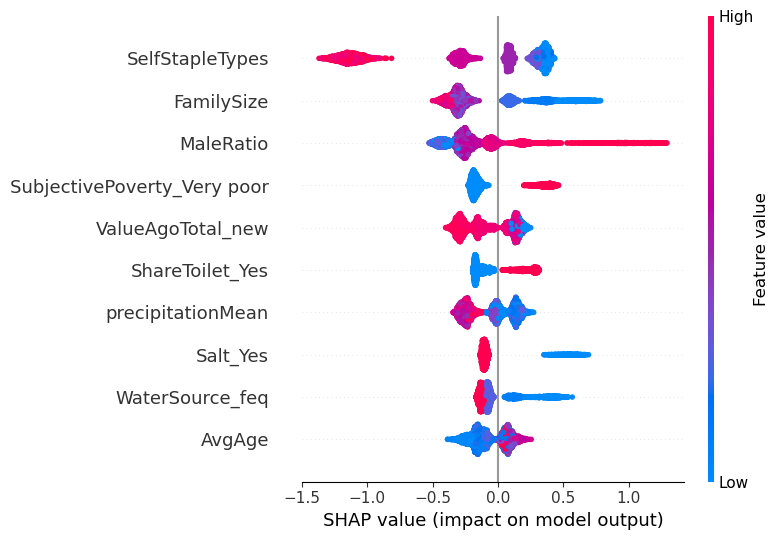

In [99]:
shap.summary_plot(shape_values_XGB_balance, X, max_display=10)

In [10]:
explainer_XGB = shap.TreeExplainer(XGB_noW)
explainer_XGB_balance = shap.TreeExplainer(XGB_district)
explainer_XGB_ada = shap.TreeExplainer(XGB_ada_district)
explainer_XGB_smote = shap.TreeExplainer(XGB_smote_district)
explainer_XGB_smoteenn = shap.TreeExplainer(XGB_smoteenn_district)
explainer_XGB_smotetom = shap.TreeExplainer(XGB_smotetom_district)

explainer_RF = shap.TreeExplainer(RF_noW)
explainer_RF_balance = shap.TreeExplainer(RF_district)
explainer_RF_ada = shap.TreeExplainer(RF_ada_district)
explainer_RF_smote = shap.TreeExplainer(RF_smote_district)
explainer_RF_smoteenn = shap.TreeExplainer(RF_smoteenn_district)
explainer_RF_smotetom = shap.TreeExplainer(RF_smotetom_district)

explainer_LR = shap.LinearExplainer(LR_noW, X)
explainer_LR_balance = shap.LinearExplainer(LR_district, X)
explainer_LR_ada = shap.LinearExplainer(LR_ada_district, x_ada)
explainer_LR_smote = shap.LinearExplainer(LR_smote_district, x_smote)
explainer_LR_smoteenn = shap.LinearExplainer(LR_smoteenn_district, x_smoteenn)
explainer_LR_smotetom = shap.LinearExplainer(LR_smotetom_district, x_smotetom)

In [11]:
shape_values_XGB = explainer_XGB.shap_values(X)
shape_values_XGB_balance = explainer_XGB_balance.shap_values(X)
shape_values_XGB_ada = explainer_XGB_ada.shap_values(x_ada)
shape_values_XGB_smote = explainer_XGB_smote.shap_values(x_smote)
shape_values_XGB_smoteenn = explainer_XGB_smoteenn.shap_values(x_smoteenn)
shape_values_XGB_smotetom = explainer_XGB_smotetom.shap_values(x_smotetom)

shape_values_RF = explainer_RF.shap_values(X)
shape_values_RF_balance = explainer_RF_balance.shap_values(X)
shape_values_RF_ada = explainer_RF_ada.shap_values(x_ada)
shape_values_RF_smote = explainer_RF_smote.shap_values(x_smote)
shape_values_RF_smoteenn = explainer_RF_smoteenn.shap_values(x_smoteenn)
shape_values_RF_smotetom = explainer_RF_smotetom.shap_values(x_smotetom)

shape_values_LR = explainer_LR.shap_values(X)
shape_values_LR_balance = explainer_LR_balance.shap_values(X)
shape_values_LR_ada = explainer_LR_ada.shap_values(x_ada)
shape_values_LR_smote = explainer_LR_smote.shap_values(x_smote)
shape_values_LR_smoteenn = explainer_LR_smoteenn.shap_values(x_smoteenn)
shape_values_LR_smotetom = explainer_LR_smotetom.shap_values(x_smotetom)

In [12]:
# Get the mean absolute SHAP values for each feature
shap_importance_XGB = np.abs(shape_values_XGB).mean(axis=0)
shap_importance_XGB_balance = np.abs(shape_values_XGB_balance).mean(axis=0)
shap_importance_XGB_ada = np.abs(shape_values_XGB_ada).mean(axis=0)
shap_importance_XGB_smote = np.abs(shape_values_XGB_smote).mean(axis=0)
shap_importance_XGB_smoteenn = np.abs(shape_values_XGB_smoteenn).mean(axis=0)
shap_importance_XGB_smotetom = np.abs(shape_values_XGB_smotetom).mean(axis=0)

shap_importance_RF = np.abs(shape_values_RF[:, :, 1]).mean(axis=0)
shap_importance_RF_balance = np.abs(shape_values_RF_balance[:, :, 1]).mean(axis=0)
shap_importance_RF_ada = np.abs(shape_values_RF_ada[:, :, 1]).mean(axis=0)
shap_importance_RF_smote = np.abs(shape_values_RF_smote[:, :, 1]).mean(axis=0)
shap_importance_RF_smoteenn = np.abs(shape_values_RF_smoteenn[:, :, 1]).mean(axis=0)
shap_importance_RF_smotetom = np.abs(shape_values_RF_smotetom[:, :, 1]).mean(axis=0)

shap_importance_LR = np.abs(shape_values_LR).mean(axis=0)
shap_importance_LR_balance = np.abs(shape_values_LR_balance).mean(axis=0)
shap_importance_LR_ada = np.abs(shape_values_LR_ada).mean(axis=0)
shap_importance_LR_smote = np.abs(shape_values_LR_smote).mean(axis=0)
shap_importance_LR_smoteenn = np.abs(shape_values_LR_smoteenn).mean(axis=0)
shap_importance_LR_smotetom = np.abs(shape_values_LR_smotetom).mean(axis=0)
# Create a DataFrame for feature importance
feature_importance_XGB = pd.DataFrame(list(zip(X.columns, shap_importance_XGB, shap_importance_XGB_balance, shap_importance_XGB_ada, shap_importance_XGB_smote, shap_importance_XGB_smoteenn, shap_importance_XGB_smotetom, 
                                               shap_importance_RF, shap_importance_RF_balance, shap_importance_RF_ada, shap_importance_RF_smote, shap_importance_RF_smoteenn, shap_importance_RF_smotetom, 
                                                  shap_importance_LR, shap_importance_LR_balance, shap_importance_LR_ada, shap_importance_LR_smote, shap_importance_LR_smoteenn, shap_importance_LR_smotetom)), 
                                    columns=['Feature', 'shap_importance_XGB', 'shap_importance_XGB_balance', 'shap_importance_XGB_ada', 'shap_importance_XGB_smote', 'shap_importance_XGB_smoteenn', 'shap_importance_XGB_smotetom', 
                                             'shap_importance_RF', 'shap_importance_RF_balance', 'shap_importance_RF_ada', 'shap_importance_RF_smote', 'shap_importance_RF_smoteenn', 'shap_importance_RF_smotetom',
                                             'shap_importance_LR', 'shap_importance_LR_balance', 'shap_importance_LR_ada', 'shap_importance_LR_smote', 'shap_importance_LR_smoteenn', 'shap_importance_LR_smotetom'])




In [ ]:
explainer_XGB = shap.TreeExplainer(XGB_noW)
explainer_XGB_balance = shap.TreeExplainer(XGB_district)
explainer_XGB_ada = shap.TreeExplainer(XGB_ada_district)
explainer_XGB_smote = shap.TreeExplainer(XGB_smote_district)
explainer_XGB_smoteenn = shap.TreeExplainer(XGB_smoteenn_district)
explainer_XGB_smotetom = shap.TreeExplainer(XGB_smotetom_district)

explainer_RF = shap.TreeExplainer(RF_noW)
explainer_RF_balance = shap.TreeExplainer(RF_district)
explainer_RF_ada = shap.TreeExplainer(RF_ada_district)
explainer_RF_smote = shap.TreeExplainer(RF_smote_district)
explainer_RF_smoteenn = shap.TreeExplainer(RF_smoteenn_district)
explainer_RF_smotetom = shap.TreeExplainer(RF_smotetom_district)

explainer_LR = shap.LinearExplainer(LR_noW, X)
explainer_LR_balance = shap.LinearExplainer(LR_district, X)
explainer_LR_ada = shap.LinearExplainer(LR_ada_district, x_ada)
explainer_LR_smote = shap.LinearExplainer(LR_smote_district, x_smote)
explainer_LR_smoteenn = shap.LinearExplainer(LR_smoteenn_district, x_smoteenn)
explainer_LR_smotetom = shap.LinearExplainer(LR_smotetom_district, x_smotetom)

In [ ]:
shape_values_XGB = explainer_XGB.shap_values(X)
shape_values_XGB_balance = explainer_XGB_balance.shap_values(X)
shape_values_XGB_ada = explainer_XGB_ada.shap_values(x_ada)
shape_values_XGB_smote = explainer_XGB_smote.shap_values(x_smote)
shape_values_XGB_smoteenn = explainer_XGB_smoteenn.shap_values(x_smoteenn)
shape_values_XGB_smotetom = explainer_XGB_smotetom.shap_values(x_smotetom)

shape_values_RF = explainer_RF.shap_values(X)
shape_values_RF_balance = explainer_RF_balance.shap_values(X)
shape_values_RF_ada = explainer_RF_ada.shap_values(x_ada)
shape_values_RF_smote = explainer_RF_smote.shap_values(x_smote)
shape_values_RF_smoteenn = explainer_RF_smoteenn.shap_values(x_smoteenn)
shape_values_RF_smotetom = explainer_RF_smotetom.shap_values(x_smotetom)

shape_values_LR = explainer_LR.shap_values(X)
shape_values_LR_balance = explainer_LR_balance.shap_values(X)
shape_values_LR_ada = explainer_LR_ada.shap_values(x_ada)
shape_values_LR_smote = explainer_LR_smote.shap_values(x_smote)
shape_values_LR_smoteenn = explainer_LR_smoteenn.shap_values(x_smoteenn)
shape_values_LR_smotetom = explainer_LR_smotetom.shap_values(x_smotetom)

In [ ]:
# Get the mean absolute SHAP values for each feature
shap_importance_XGB = np.abs(shape_values_XGB).mean(axis=0)
shap_importance_XGB_balance = np.abs(shape_values_XGB_balance).mean(axis=0)
shap_importance_XGB_ada = np.abs(shape_values_XGB_ada).mean(axis=0)
shap_importance_XGB_smote = np.abs(shape_values_XGB_smote).mean(axis=0)
shap_importance_XGB_smoteenn = np.abs(shape_values_XGB_smoteenn).mean(axis=0)
shap_importance_XGB_smotetom = np.abs(shape_values_XGB_smotetom).mean(axis=0)

shap_importance_RF = np.abs(shape_values_RF[:, :, 1]).mean(axis=0)
shap_importance_RF_balance = np.abs(shape_values_RF_balance[:, :, 1]).mean(axis=0)
shap_importance_RF_ada = np.abs(shape_values_RF_ada[:, :, 1]).mean(axis=0)
shap_importance_RF_smote = np.abs(shape_values_RF_smote[:, :, 1]).mean(axis=0)
shap_importance_RF_smoteenn = np.abs(shape_values_RF_smoteenn[:, :, 1]).mean(axis=0)
shap_importance_RF_smotetom = np.abs(shape_values_RF_smotetom[:, :, 1]).mean(axis=0)

shap_importance_LR = np.abs(shape_values_LR).mean(axis=0)
shap_importance_LR_balance = np.abs(shape_values_LR_balance).mean(axis=0)
shap_importance_LR_ada = np.abs(shape_values_LR_ada).mean(axis=0)
shap_importance_LR_smote = np.abs(shape_values_LR_smote).mean(axis=0)
shap_importance_LR_smoteenn = np.abs(shape_values_LR_smoteenn).mean(axis=0)
shap_importance_LR_smotetom = np.abs(shape_values_LR_smotetom).mean(axis=0)
# Create a DataFrame for feature importance
feature_importance_XGB = pd.DataFrame(list(zip(X.columns, shap_importance_XGB, shap_importance_XGB_balance, shap_importance_XGB_ada, shap_importance_XGB_smote, shap_importance_XGB_smoteenn, shap_importance_XGB_smotetom, 
                                               shap_importance_RF, shap_importance_RF_balance, shap_importance_RF_ada, shap_importance_RF_smote, shap_importance_RF_smoteenn, shap_importance_RF_smotetom, 
                                                  shap_importance_LR, shap_importance_LR_balance, shap_importance_LR_ada, shap_importance_LR_smote, shap_importance_LR_smoteenn, shap_importance_LR_smotetom)), 
                                    columns=['Feature', 'shap_importance_XGB', 'shap_importance_XGB_balance', 'shap_importance_XGB_ada', 'shap_importance_XGB_smote', 'shap_importance_XGB_smoteenn', 'shap_importance_XGB_smotetom', 
                                             'shap_importance_RF', 'shap_importance_RF_balance', 'shap_importance_RF_ada', 'shap_importance_RF_smote', 'shap_importance_RF_smoteenn', 'shap_importance_RF_smotetom',
                                             'shap_importance_LR', 'shap_importance_LR_balance', 'shap_importance_LR_ada', 'shap_importance_LR_smote', 'shap_importance_LR_smoteenn', 'shap_importance_LR_smotetom'])




In [ ]:
# feature_importance_XGB.to_csv('bld/feature_importance_district_shap.csv', index=False)
feature_importance_XGB.to_csv('bld/feature_importance_district_shap_testingdata.csv', index=False)

In [13]:
# feature_importance_XGB.to_csv('bld/feature_importance_district_shap.csv', index=False)
feature_importance_XGB.to_csv('bld/feature_importance_district_shap_testingdata.csv', index=False)

In [134]:
shape_values_LR_smoteenn = np.rint(shape_values_LR_smoteenn.astype(float))

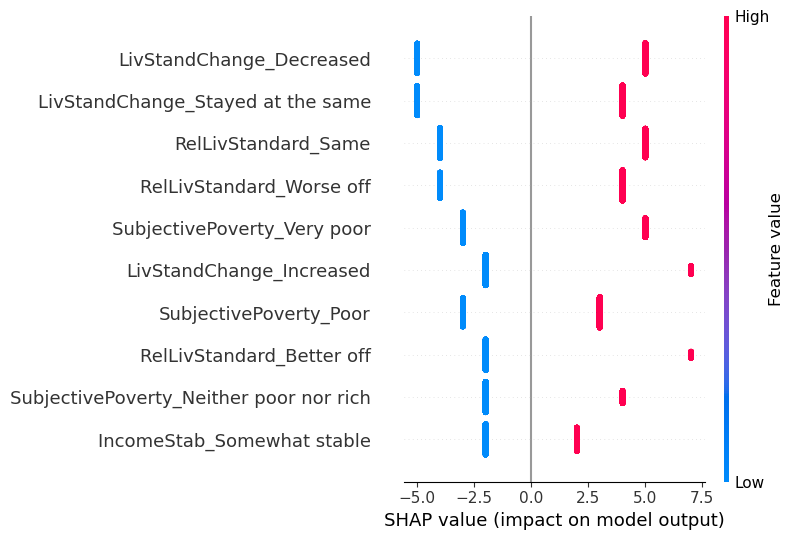

In [135]:
shap.summary_plot(shape_values_LR_smoteenn, x_smoteenn, max_display=10)

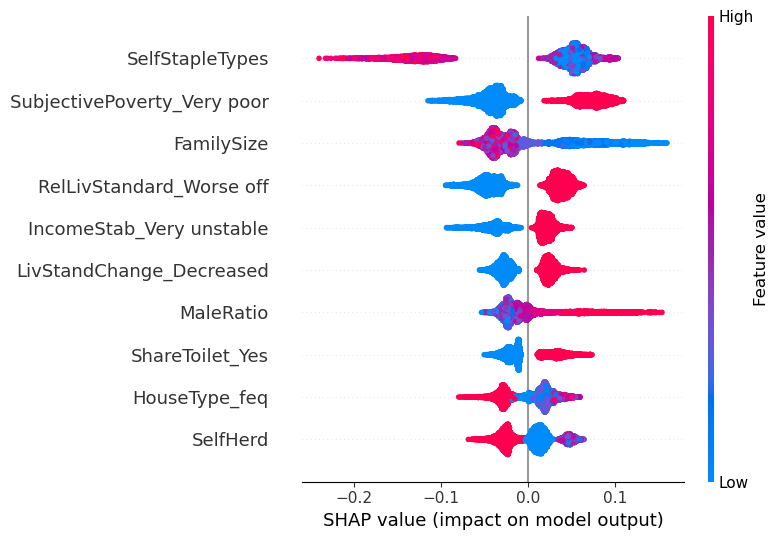

In [166]:
shap.summary_plot(shape_values_RF_ada[:, :,1], x_ada, max_display=10)

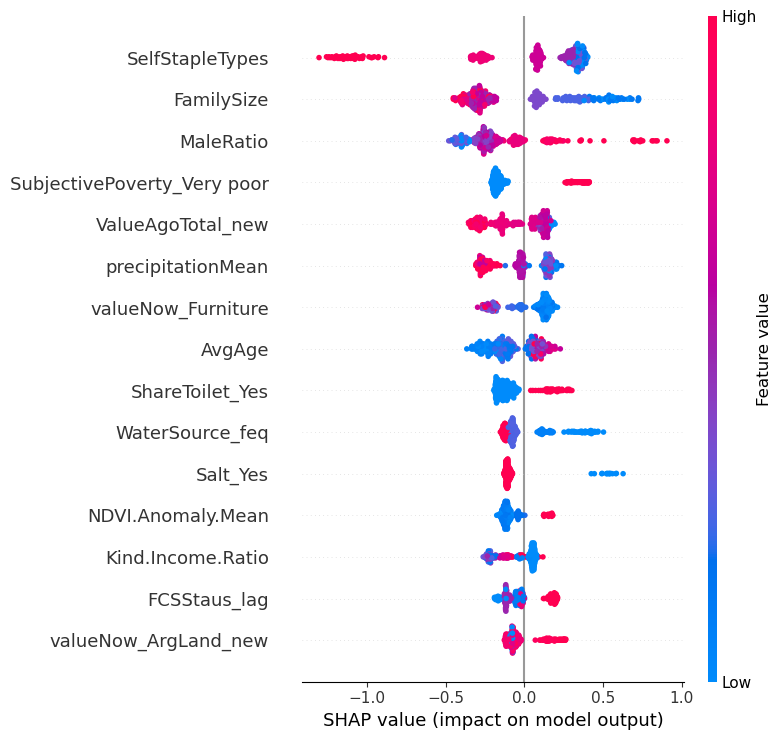

In [13]:
shap.summary_plot(shape_values_XGB_balance, X, max_display=15)

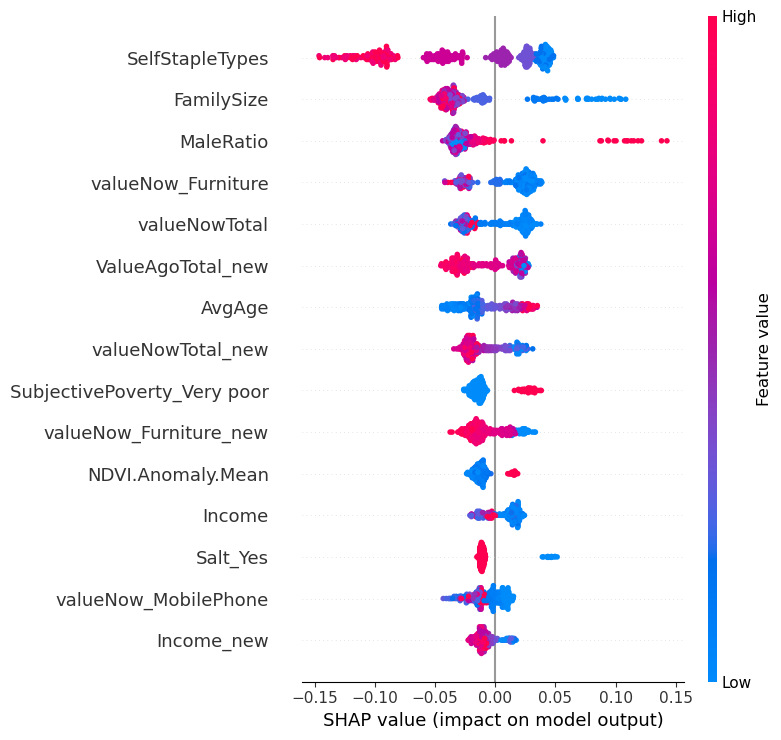

In [15]:
shap.summary_plot(shape_values_RF_balance[:, :, 1], X, max_display=15)

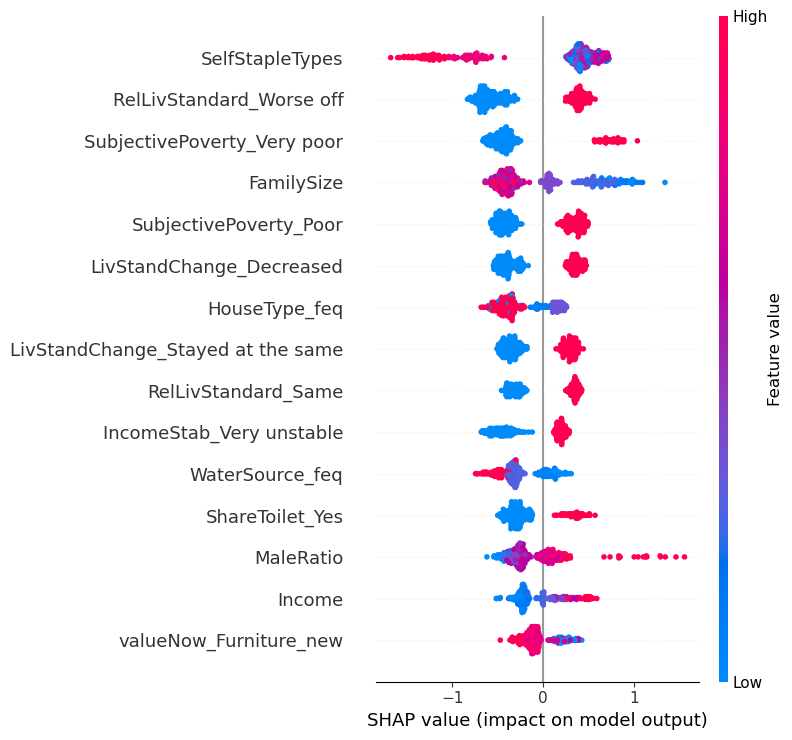

In [37]:
# import matplotlib.pyplot as plt

# # Create the SHAP summary plot
fig = shap.summary_plot(shape_values_XGB_smoteenn, x_smoteenn, max_display=15, show = False)

# # Save the plot as a figure
plt.savefig('bld/figures/shape_values_XGB_smoteenn.png')

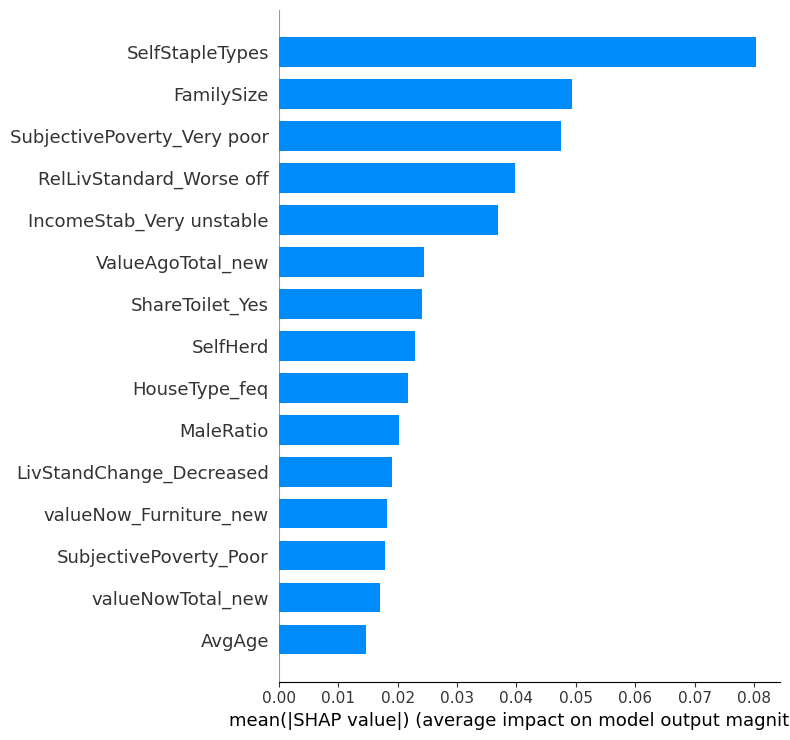

In [50]:
#import matplotlib.pyplot as plt

# # Create the SHAP summary plot
fig = shap.summary_plot(shape_values_RF_smoteenn[:, :, 1], x_smoteenn, plot_type='bar', max_display=15, show = False)

# # Save the plot as a figure
plt.savefig('bld/figures/SHAP/bar/shape_values_RF_smoteenn.png')

In [9]:
# Ensure all data in X is of numeric type
X_numeric = X.astype(float)

exp_test = shap.Explainer(XGB_district, X_numeric)
shap_values = exp_test(X_numeric)

 99%|===================| 342/345 [00:12<00:00]        

In [10]:
shap_values.shape

(345, 51)

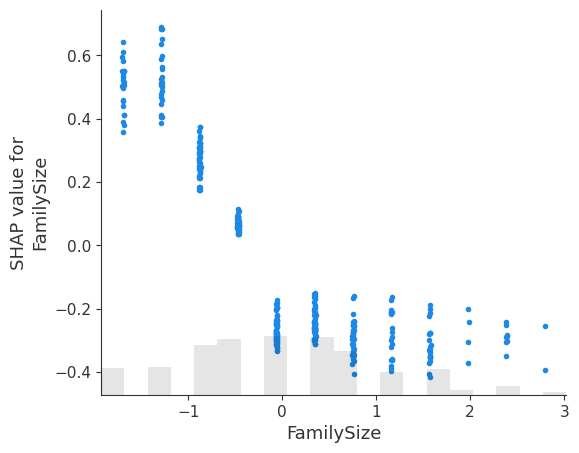

In [19]:
shap.plots.scatter(shap_values[:, 'FamilySize'])

In [29]:
y_equals_1 = y[y == 1]
print(y_equals_1)

10     1
89     1
95     1
107    1
119    1
155    1
188    1
282    1
305    1
311    1
312    1
325    1
Name: FCSStaus, dtype: int64


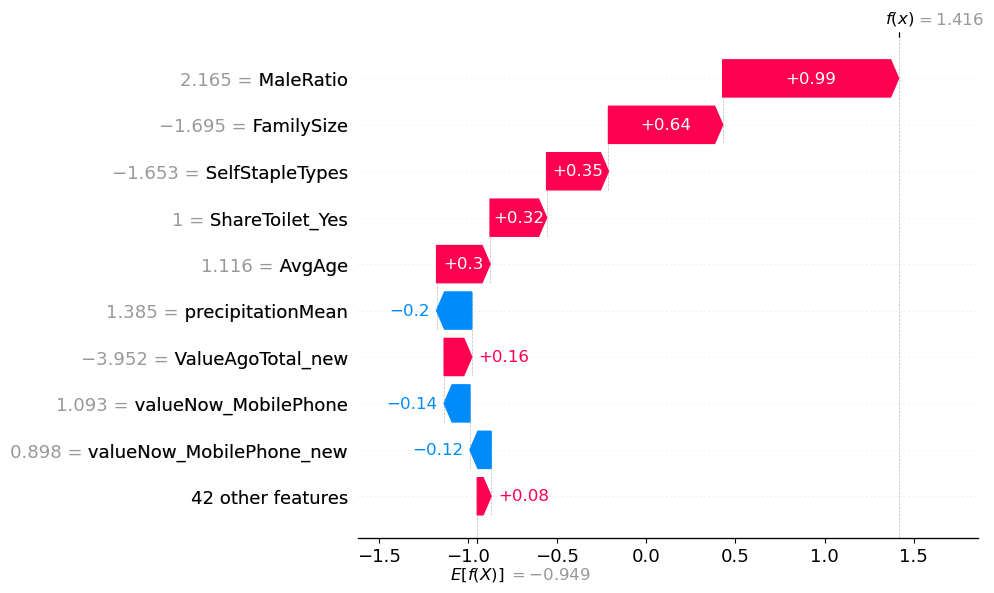

In [38]:
shap.plots.waterfall(shap_values[325], max_display=10)

In [50]:
# import matplotlib.pyplot as plt

# # Create the SHAP summary plot
# fig = shap.plots.scatter(shap_values[:, 'SelfStapleTypes'], show = False)
fig = shap.plots.waterfall(shap_values[325], max_display=10, show = False)
plt.gcf().set_size_inches(10, 6)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
# plt.savefig('bld/figures/SHAP/waterfall.png')

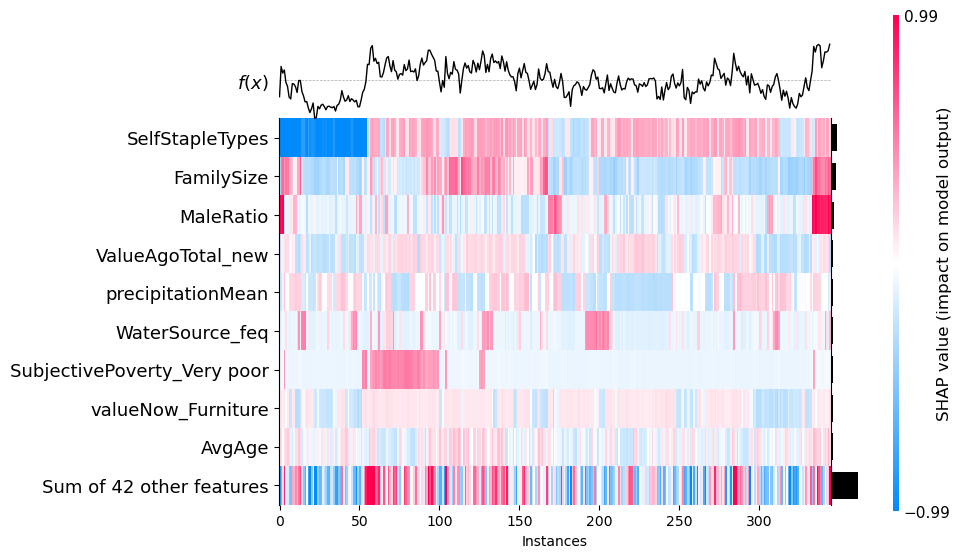

<Axes: xlabel='Instances'>

In [14]:
shap.plots.heatmap(shap_values[:])

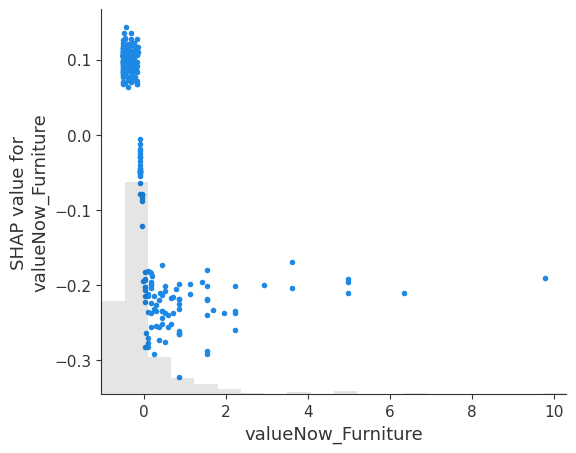

In [27]:
shap.plots.scatter(shap_values[:, 'valueNow_Furniture'])

In [169]:
index_self_staple_types = predictorList.index('SelfStapleTypes')
print(index_self_staple_types)

35


In [ ]:
import shap

# Extract the model and data
model = XGB_district
X = data_during_district_balanced[predictorList]
y = data_during_district_balanced['FCSStatus']

# Create a SHAP explainer
explainer = shap.TreeExplainer(model)

# Calculate SHAP values
shap_values = explainer(X)

# Plot the SHAP summary plot
# shap.summary_plot(shap_values, X)

# Get the mean absolute SHAP values for each feature
shap_importance = np.abs(shap_values.values).mean(axis=0)

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame(list(zip(X.columns, shap_importance)), columns=['Feature', 'Importance'])

# Sort the features by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Display the feature importance
print(feature_importance)

In [51]:
import pickle

file_path_RF = r"D:\PhD\[Revision]\Masterarbeit\bld\single_case_before\RF_dict_models.pkl"

with open(file_path_RF, 'rb') as file:
    RF_dict_models = pickle.load(file)

file_path_XGB = r"D:\PhD\[Revision]\Masterarbeit\bld\single_case_before\XGB_dict_models.pkl"

with open(file_path_XGB, 'rb') as file:
    XGB_dict_models = pickle.load(file)
    
file_path_LR = r"D:\PhD\[Revision]\Masterarbeit\bld\single_case_before\LR_dict_models.pkl"

with open(file_path_LR, 'rb') as file:
    LR_dict_models = pickle.load(file)

In [55]:
XGB_district = XGB_dict_models['xgb_district']
XGB_ada_district = XGB_dict_models['xgb_district_ada']
XGB_smote_district = XGB_dict_models['xgb_district_smote']
XGB_smoteenn_district = XGB_dict_models['xgb_district_smoteenn']
XGB_smotetom_district = XGB_dict_models['xgb_district_smotetom']
LR_district = LR_dict_models['LR_l2_district_before']
LR_ada_district = LR_dict_models['LR_l2_district_before_ads']
LR_smote_district = LR_dict_models['LR_l2_district_before_smote']
LR_smoteenn_district = LR_dict_models['LR_l2_district_before_smoteenn']
LR_smotetom_district = LR_dict_models['LR_l2_district_before_smotetom']
RF_district = RF_dict_models['RF_best_district']
RF_ada_district = RF_dict_models['RF_best_district_ada']
RF_smote_district = RF_dict_models['RF_best_district_smote']
RF_smoteenn_district = RF_dict_models['RF_best_district_smoteenn']
RF_smotetom_district = RF_dict_models['RF_best_district_smotetom']


In [59]:
file_path_LR_noW = r"D:\PhD\[Revision]\Masterarbeit\bld\single_case_noW\LR_dict_models.pkl"
file_path_RF_noW = r"D:\PhD\[Revision]\Masterarbeit\bld\single_case_noW\RF_dict_models.pkl"
file_path_XGB_noW = r"D:\PhD\[Revision]\Masterarbeit\bld\single_case_noW\XGB_dict_models.pkl"

with open(file_path_LR_noW, 'rb') as file:
    LR_dict_models_noW = pickle.load(file)

with open(file_path_RF_noW, 'rb') as file:
    RF_dict_models_noW = pickle.load(file)

with open(file_path_XGB_noW, 'rb') as file:
    XGB_dict_models_noW = pickle.load(file)

LR_noW = LR_dict_models_noW['LR_l2_district_before']
RF_noW = RF_dict_models_noW['RF_best_district']
XGB_noW = XGB_dict_models_noW['xgb_district']

In [68]:
data_before_district_balanced = data_before_district['StdTest_district_during']['test_10']
data_before_district_ada = data_before_district['StdTest_district_during']['test_10']
data_before_district_smote = data_before_district['StdTest_district_during']['test_10']
data_before_district_smoteenn = data_before_district['StdTest_district_during']['test_10']
data_before_district_smotetom = data_before_district['StdTest_district_during']['test_10']
X = data_before_district_balanced[predictorList]

In [64]:
explainer_XGB = shap.TreeExplainer(XGB_noW)
explainer_XGB_balance = shap.TreeExplainer(XGB_district)
explainer_XGB_ada = shap.TreeExplainer(XGB_ada_district)
explainer_XGB_smote = shap.TreeExplainer(XGB_smote_district)
explainer_XGB_smoteenn = shap.TreeExplainer(XGB_smoteenn_district)
explainer_XGB_smotetom = shap.TreeExplainer(XGB_smotetom_district)

explainer_RF = shap.TreeExplainer(RF_noW)
explainer_RF_balance = shap.TreeExplainer(RF_district)
explainer_RF_ada = shap.TreeExplainer(RF_ada_district)
explainer_RF_smote = shap.TreeExplainer(RF_smote_district)
explainer_RF_smoteenn = shap.TreeExplainer(RF_smoteenn_district)
explainer_RF_smotetom = shap.TreeExplainer(RF_smotetom_district)

# explainer_LR = shap.LinearExplainer(LR_noW, X)
# explainer_LR_balance = shap.LinearExplainer(LR_district, X)
# explainer_LR_ada = shap.LinearExplainer(LR_ada_district, x_ada)
# explainer_LR_smote = shap.LinearExplainer(LR_smote_district, x_smote)
# explainer_LR_smoteenn = shap.LinearExplainer(LR_smoteenn_district, x_smoteenn)
# explainer_LR_smotetom = shap.LinearExplainer(LR_smotetom_district, x_smotetom)

In [69]:
shape_values_XGB = explainer_XGB.shap_values(X)
shape_values_XGB_balance = explainer_XGB_balance.shap_values(X)
shape_values_XGB_ada = explainer_XGB_ada.shap_values(X)
shape_values_XGB_smote = explainer_XGB_smote.shap_values(X)
shape_values_XGB_smoteenn = explainer_XGB_smoteenn.shap_values(X)
shape_values_XGB_smotetom = explainer_XGB_smotetom.shap_values(X)

shape_values_RF = explainer_RF.shap_values(X)
shape_values_RF_balance = explainer_RF_balance.shap_values(X)
shape_values_RF_ada = explainer_RF_ada.shap_values(X)
shape_values_RF_smote = explainer_RF_smote.shap_values(X)
shape_values_RF_smoteenn = explainer_RF_smoteenn.shap_values(X)
shape_values_RF_smotetom = explainer_RF_smotetom.shap_values(X)

# shape_values_LR = explainer_LR.shap_values(X)
# shape_values_LR_balance = explainer_LR_balance.shap_values(X)
# shape_values_LR_ada = explainer_LR_ada.shap_values(x_ada)
# shape_values_LR_smote = explainer_LR_smote.shap_values(x_smote)
# shape_values_LR_smoteenn = explainer_LR_smoteenn.shap_values(x_smoteenn)
# shape_values_LR_smotetom = explainer_LR_smotetom.shap_values(x_smotetom)

In [70]:
# Get the mean absolute SHAP values for each feature
shap_importance_XGB = np.abs(shape_values_XGB).mean(axis=0)
shap_importance_XGB_balance = np.abs(shape_values_XGB_balance).mean(axis=0)
shap_importance_XGB_ada = np.abs(shape_values_XGB_ada).mean(axis=0)
shap_importance_XGB_smote = np.abs(shape_values_XGB_smote).mean(axis=0)
shap_importance_XGB_smoteenn = np.abs(shape_values_XGB_smoteenn).mean(axis=0)
shap_importance_XGB_smotetom = np.abs(shape_values_XGB_smotetom).mean(axis=0)

shap_importance_RF = np.abs(shape_values_RF[:, :, 1]).mean(axis=0)
shap_importance_RF_balance = np.abs(shape_values_RF_balance[:, :, 1]).mean(axis=0)
shap_importance_RF_ada = np.abs(shape_values_RF_ada[:, :, 1]).mean(axis=0)
shap_importance_RF_smote = np.abs(shape_values_RF_smote[:, :, 1]).mean(axis=0)
shap_importance_RF_smoteenn = np.abs(shape_values_RF_smoteenn[:, :, 1]).mean(axis=0)
shap_importance_RF_smotetom = np.abs(shape_values_RF_smotetom[:, :, 1]).mean(axis=0)

# shap_importance_LR = np.abs(shape_values_LR).mean(axis=0)
# shap_importance_LR_balance = np.abs(shape_values_LR_balance).mean(axis=0)
# shap_importance_LR_ada = np.abs(shape_values_LR_ada).mean(axis=0)
# shap_importance_LR_smote = np.abs(shape_values_LR_smote).mean(axis=0)
# shap_importance_LR_smoteenn = np.abs(shape_values_LR_smoteenn).mean(axis=0)
# shap_importance_LR_smotetom = np.abs(shape_values_LR_smotetom).mean(axis=0)
# Create a DataFrame for feature importance
feature_importance_XGB = pd.DataFrame(list(zip(X.columns, shap_importance_XGB, shap_importance_XGB_balance, shap_importance_XGB_ada, shap_importance_XGB_smote, shap_importance_XGB_smoteenn, shap_importance_XGB_smotetom, 
                                               shap_importance_RF, shap_importance_RF_balance, shap_importance_RF_ada, shap_importance_RF_smote, shap_importance_RF_smoteenn, shap_importance_RF_smotetom)), 
                                    columns=['Feature', 'shap_importance_XGB', 'shap_importance_XGB_balance', 'shap_importance_XGB_ada', 'shap_importance_XGB_smote', 'shap_importance_XGB_smoteenn', 'shap_importance_XGB_smotetom', 
                                             'shap_importance_RF', 'shap_importance_RF_balance', 'shap_importance_RF_ada', 'shap_importance_RF_smote', 'shap_importance_RF_smoteenn', 'shap_importance_RF_smotetom'])




In [71]:
# feature_importance_XGB.to_csv('bld/feature_importance_district_shap.csv', index=False)
feature_importance_XGB.to_csv('bld/feature_importance_district_before_shap_testingdata.csv', index=False)